# U.S. Medical Insurance Costs

Finding average cost in U.S. Medical Insurance and analyzing different factors that may play a role in price

Columns : [`age`, `sex`, `bmi`, `children`, `smoker`, `region`, `charges`] 

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

In [160]:
df = pd.read_csv('insurance.csv')

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [162]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [163]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Answering The Questions

- Does smoking effect your charge price?
- Do certain regions pay more than others?
- Finding correlations between columns and prices that may have a major impact



### **First Let's Start With Smoking**

In [164]:
avg_smoke_cost = df.groupby('smoker')['charges'].mean()
avg_smoke_cost

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

<AxesSubplot:title={'center':'Number of Smokers'}, xlabel='Smoker (Y/N)', ylabel='Number of smokers or non-smokers'>

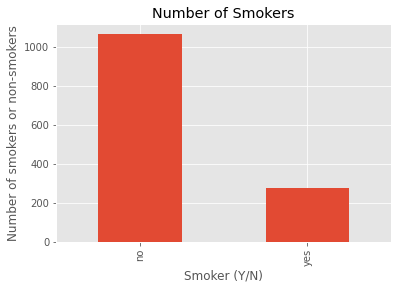

In [165]:
ax = df['smoker'].value_counts().head().plot(kind='bar', title='Number of Smokers')
ax.set_xlabel("Smoker (Y/N)")
ax.set_ylabel("Number of smokers or non-smokers")
ax

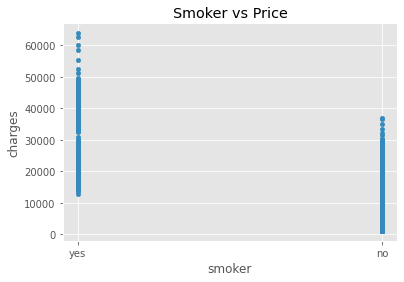

In [166]:
df.plot(kind='scatter', x='smoker', y='charges', title='Smoker vs Price')
plt.show()

We can clearly see that smoking plays a huge role in the price of healthcare, but there is more to it than just this. <br>
There is still a little bit of overlap between the two, lets see if we can find out those areas toward the end. <br>
For now we can clearly see that smoking does effect the price.

### **Does Region Effect Price?**

In [167]:
region_counts = df['region'].value_counts()
region_counts

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

Text(0, 0.5, '# of People')

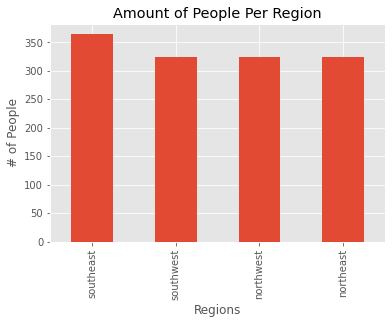

In [168]:
ax = df['region'].value_counts().head().plot(kind='bar', title='Amount of People Per Region')
ax.set_xlabel("Regions")
ax.set_ylabel("# of People")

In [169]:
print(df.groupby('region')['charges'].max())

region
northeast    58571.07448
northwest    60021.39897
southeast    63770.42801
southwest    52590.82939
Name: charges, dtype: float64


Text(0, 0.5, 'Avg Cost Per Region')

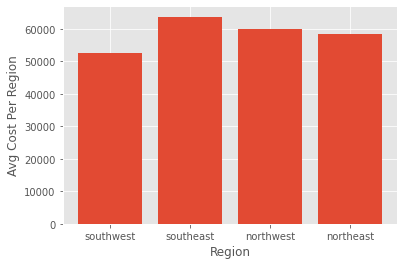

In [170]:
plt.bar(df['region'], df['charges'])
plt.xlabel("Region")
plt.ylabel("Avg Cost Per Region")

This does not give us too much, we can see that south east has the highest value but, all of them are very similar besides the southwest. <br>
Southwest is a bit lower than the rest, something we will be looking into during the final part of the exploration. <br>
Curious to see if the southwest has less smokers in the area 


### **Finding Major Correlations and Biggest Factors**

In [171]:
avg_child_cost = df.groupby('children')['charges'].mean()
avg_child_cost

children
0    12365.975602
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges, dtype: float64

In [172]:
child_counts = df['children'].value_counts()
child_counts

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [173]:
child4 = []
child4_price = []
child5 = []
child5_price = []

for index, row in df.iterrows():
    if row['children'] == 5:
        print(f"The child count is 5 and there charge is: {row['charges']}")
        child5.append(row['children'])
        child5_price.append(row['charges'])
    elif row['children'] == 4:
        print(f"The child count is 4 and there charge is: {row['charges']}")
        child4.append(row['children'])
        child4_price.append(row['charges'])

The child count is 5 and there charge is: 4687.797
The child count is 4 and there charge is: 4504.6624
The child count is 5 and there charge is: 6799.458
The child count is 4 and there charge is: 11033.6617
The child count is 4 and there charge is: 10407.08585
The child count is 5 and there charge is: 4830.63
The child count is 4 and there charge is: 8162.71625
The child count is 4 and there charge is: 11520.09985
The child count is 4 and there charge is: 24671.66334
The child count is 4 and there charge is: 10977.2063
The child count is 4 and there charge is: 10736.87075
The child count is 5 and there charge is: 5080.096
The child count is 5 and there charge is: 9788.8659
The child count is 5 and there charge is: 12592.5345
The child count is 4 and there charge is: 7512.267
The child count is 4 and there charge is: 17942.106
The child count is 5 and there charge is: 11552.904
The child count is 4 and there charge is: 40182.246
The child count is 4 and there charge is: 12949.1554
The c

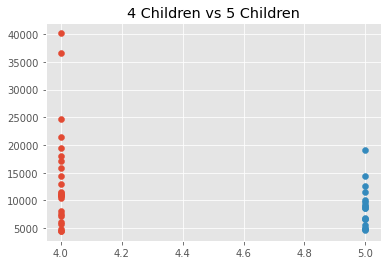

In [178]:
plt.scatter(child4, child4_price)
plt.scatter(child5, child5_price)
plt.title("4 Children vs 5 Children")
plt.show()

Text(0, 0.5, 'Price')

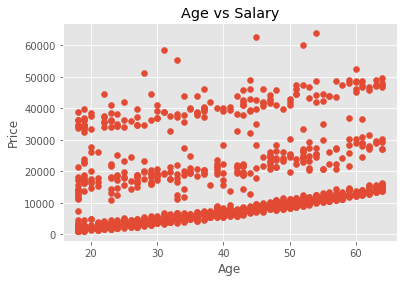

In [175]:
plt.scatter(df['age'], df['charges'])
plt.title('Age vs Salary')
plt.xlabel("Age")
plt.ylabel("Price")

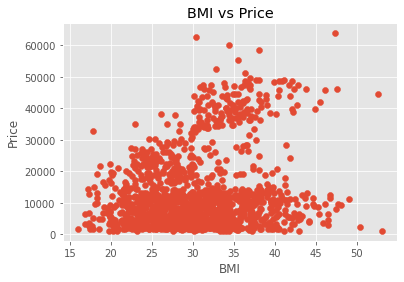

In [177]:
plt.scatter(df['bmi'], df['charges'])
plt.title("BMI vs Price")
plt.xlabel('BMI')
plt.ylabel('Price')
plt.show()

In [179]:
print(df['charges'].min())
print(df[df['charges'] == 1121.8739])

1121.8739
     age   sex    bmi  children smoker     region    charges
940   18  male  23.21         0     no  southeast  1121.8739


# Conclusion

After exploring this data set it is clear that there are 3 major factors which decided your medical insurance price. <br>

1. Smoker vs non-smoker: This one was one of the biggest indicators of someone paying more for medical insurance, throughout the data you can clearly see smokers pay more. <br>

2. Age: On the <`Age vs Salary`> plot there is almost a perfect linear regression with the increase in age and medical insurance. <br>

3. BMI: This one was trickly but, in the figure above you are able to see at around 35+ the price of your medical insurance increases. I think it is safe <br>
to say that anything under 35 is a good BMI and won't hinder the price of your medical insurance. <br>

In the future I would like to dive a bit deeper into the gender, and mix gender + age to see if it causes a increase in medical insurance, I think it would be intersting <br>
to dive into Males who are in the age range of 18 - 30. (In the future I will add more to this EDA)